# COVID-19 Brasil - Análise Geográfica

## Conteúdo

Nesta secção iremos avaliar os dados geográficos da Covid-19 através do mapa do Brasil, divido por estados.
Para isso tivemos de exportar um *shapefile* com os estados e províncias do mundo e restringi-lo apenas para o Brasil.

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.graph_objs import *
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime
import geopandas as gpd
from bokeh.layouts import row,column,gridplot

import warnings
warnings.filterwarnings('ignore')

# Ler os dados
data = pd.read_csv('./data/brazil_covid19.csv')

# Ler shapefile
world_data = gpd.read_file('./data/geo_data/ne_10m_admin_1_states_provinces.shp')

Só iremos utilizar os dados referidos ao último dia do nosso dataset.

In [2]:
last_date = data['date'].tail(1).item()
data_by_state = data[['cases','deaths']][data['date']==last_date].groupby(data['state']).sum().sort_values(by = 'cases', ascending=False)
data_state = data_by_state.sort_values(by='state')
data_state = data_state.reset_index()

Filtramos os dados geométricos dos estados do Brasil do *shapefile*, que contém os estados e províncias de todo mundo.

In [3]:
world = world_data['iso_a2'] == 'BR'
world = world_data[world].filter(items=['name_nl', 'geometry'])
world = world.reset_index()
world = world.filter(items=['name_nl', 'geometry'])
world = world.sort_values(by='name_nl')
world = world.reset_index()
world = world['geometry']
mapa = pd.concat([world, data_state], axis=1, join='inner')

No mapa do Brasil que se segue, podemos observar geograficamente a distribuição do número de casos, até à data, pelos respectivos estados:


Bad key "text.kerning_factor" on line 4 in
C:\Users\tonil\anaconda3\envs\gputest\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


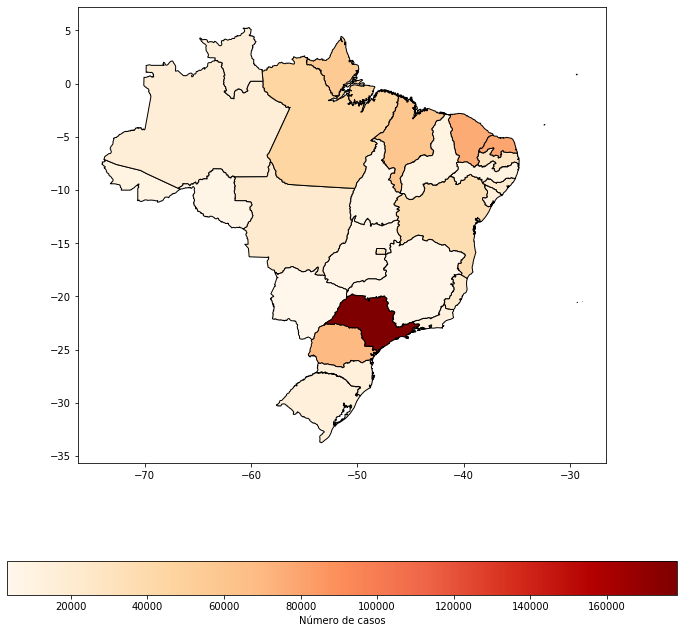

In [4]:
gdf = gpd.GeoDataFrame(mapa, geometry='geometry')
gdf.plot(column='cases',figsize=(12, 12),edgecolor='k',cmap='OrRd',legend=True,legend_kwds={'label': "Número de casos", 'orientation': "horizontal"})

Já como foi anteriormente analisado, o estado São Paulo é claramente o estado com maior número de casos.

No mapa do Brasil que se segue, podemos observar geograficamente a distribuição do número do mortes, até à data, pelos respectivos estados:

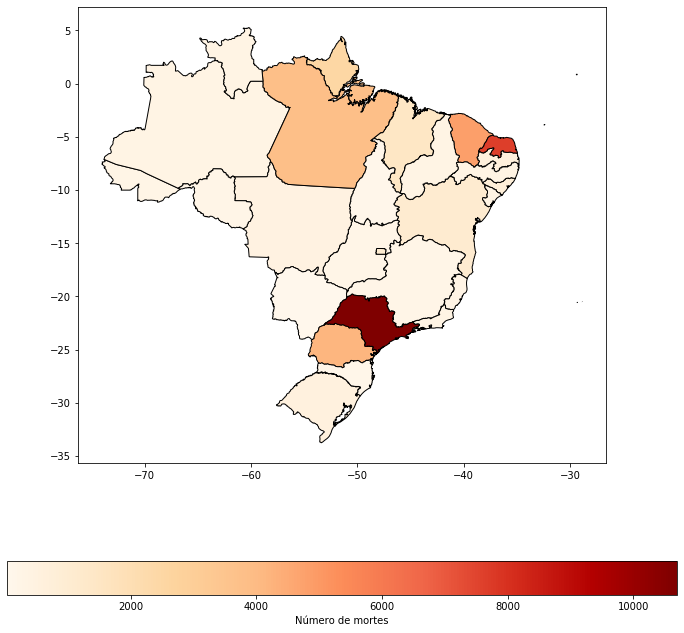

In [5]:
gdf.plot(column='deaths',figsize=(12, 12),edgecolor='k',cmap='OrRd',legend=True, legend_kwds={'label': "Número de mortes", 'orientation': "horizontal"})

Neste mapa podemos observar que a relação do número mortes por estado, não muda muito daquilo que é a relação do número de casos por estado, o que é um pouco normal, visto que quantos mais casos, a tendência é de haver mais mortes.

Iremos de seguida calcular a percentagem da taxa de letalidade por estado.

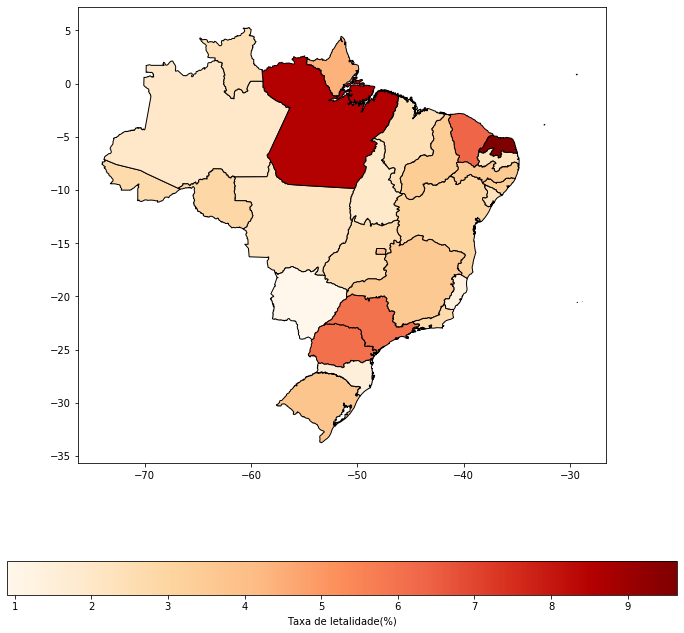

In [6]:
gdf['letalidade'] =  range(1, len(gdf) + 1)
gdf['letalidade'] = gdf['letalidade'].astype(float)
i=0
while i < len(gdf):
    gdf['letalidade'][i] = (gdf['deaths'][i]/gdf['cases'][i])*10**2
    i+=1
gdf = gpd.GeoDataFrame(gdf, geometry='geometry')
gdf.plot(column='letalidade',figsize=(12, 12),edgecolor='k',cmap='OrRd',legend=True, legend_kwds={'label': "Taxa de letalidade(%)", 'orientation': "horizontal"})

In [7]:
print(max(gdf['letalidade']))

9.641582466194139


Como podemos observar a taxa de letalidade mais alta por estado é cerca de 9,64%, referente ao estado Rio grande do norte.

Iremos agora utilizar um dataset que foi retirado do mesmo repositório disponibilizado anteriormente: 

https://www.kaggle.com/unanimad/corona-virus-brazil

Este contém informação do Tribunal de Contas da União, acerca do número de habitantes por cidades e estados, relativo a 2019.
Visto que o número de habitantes difere bastante entre os estados, optamos por fazer uma comparação mais adequada entre, o número de casos e o número de mortes, relativa ao número de habitantes. Sabendo que estes dados não estão atualizados ao mesmo tempo que os casos relativos à Covid-19, este serve apenas como uma estimativa, sabendo que os valores não diferenciam muito em relação ao presente.


In [8]:
pop = pd.read_csv('./data/brazil_population_2019.csv',error_bad_lines=False)
population = pop['population'].groupby(pop['state']).sum()
population = population.reset_index()
population = population.sort_values(by=['state'])
population = population['population']
gdf1 = pd.concat([gdf, population], axis=1, join='inner')
gdf1['popcases'] =  range(1, len(gdf1) + 1)
gdf1['popcases'] = gdf1['popcases'].astype(float)
i=0
while i < len(gdf1):
    gdf1['popcases'][i] = (gdf1['cases'][i]/gdf1['population'][i])*10**6
    i+=1
gdf1['popdeaths'] =  range(1, len(gdf1) + 1)
gdf1['popdeaths'] = gdf1['popdeaths'].astype(float)
i=0
while i < len(gdf1):
    gdf1['popdeaths'][i] = (gdf1['deaths'][i]/gdf1['population'][i])*10**6
    i+=1
gdf = gpd.GeoDataFrame(gdf1, geometry='geometry')

11839.681721063876
7662.511235404329
66813.20656331623
11151.05314376363
3384.288722474472
8489.319659807781
7585.063748893962
6882.897038201498
1413.2641170746288
9390.683500545554
8964.415283738983
1663.3001755355822
381.0385937940054
7671.017483475139
8720.798105725473
5400.5545528675875
1116.9327243026542
3944.273908687775
26826.21519835291
1533.0617073835133
690.2577951426562
4503.150240157096
24689.67398717774
2134.008378538584
6403.623585396547
4049.1848187176215
6277.744262058905


b'Skipping line 1282: expected 8 fields, saw 9\nSkipping line 1283: expected 8 fields, saw 9\nSkipping line 1293: expected 8 fields, saw 9\nSkipping line 1294: expected 8 fields, saw 9\nSkipping line 1300: expected 8 fields, saw 9\nSkipping line 1308: expected 8 fields, saw 9\nSkipping line 1309: expected 8 fields, saw 9\nSkipping line 1314: expected 8 fields, saw 9\nSkipping line 1319: expected 8 fields, saw 9\nSkipping line 1320: expected 8 fields, saw 9\nSkipping line 1321: expected 8 fields, saw 9\nSkipping line 1323: expected 8 fields, saw 9\n'


No mapa que se segue, podemos observar geograficamente a distribuição de número de habitantes, pelos respectivos estados:

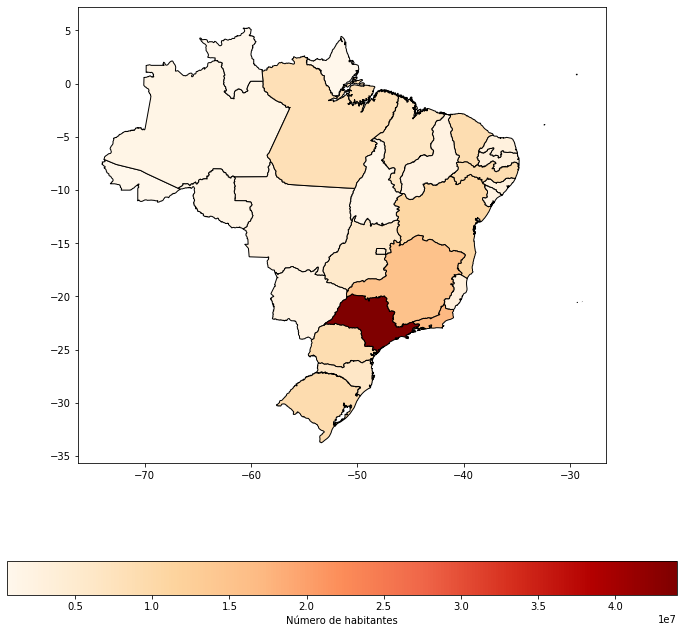

In [11]:
gdf.plot(column='population',figsize=(12, 12),edgecolor='k',cmap='OrRd',legend=True,legend_kwds={'label': "Número de habitantes", 'orientation': "horizontal"})


Podemos verificar que o estado São Paulo é destacadamente o estado com maior número de habitantes, tendo mais do dobro de habitantes do que o estado Rio de Janeiro, segundo estado com maior número de habitantes.

No mapa que se segue, podemos observar geograficamente a distribuição de número do casos por milhão de habitantes, pelos respectivos estados:

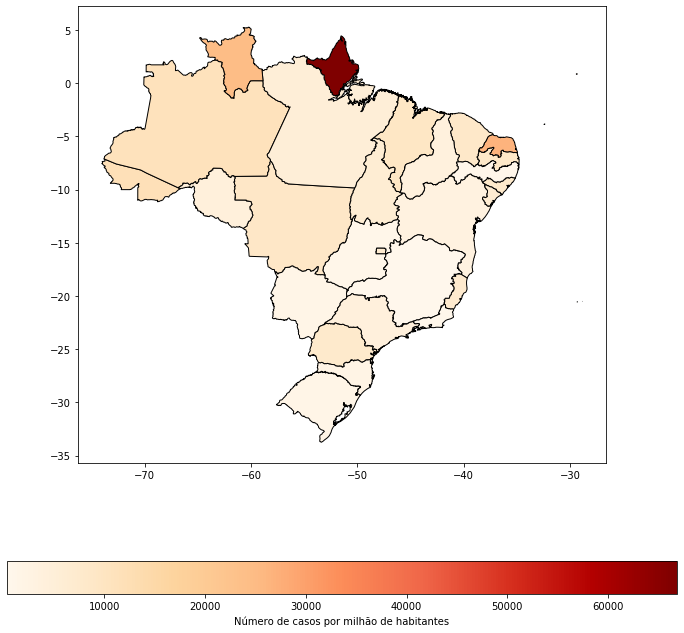

In [12]:
gdf.plot(column='popcases',figsize=(12, 12),edgecolor='k',cmap='OrRd',legend=True,legend_kwds={'label': "Número de casos por milhão de habitantes", 'orientation': "horizontal"})


Como podemos observar, o estado Amapá, sendo um estado com relativamente poucos habitantes, possui um número muito elevado de casos confirmados com Covid-19 por milhão de habitantes.

No mapa que se segue, podemos observar geograficamente a distribuição do número de mortes por milhão de habitantes, pelos respectivos estados:

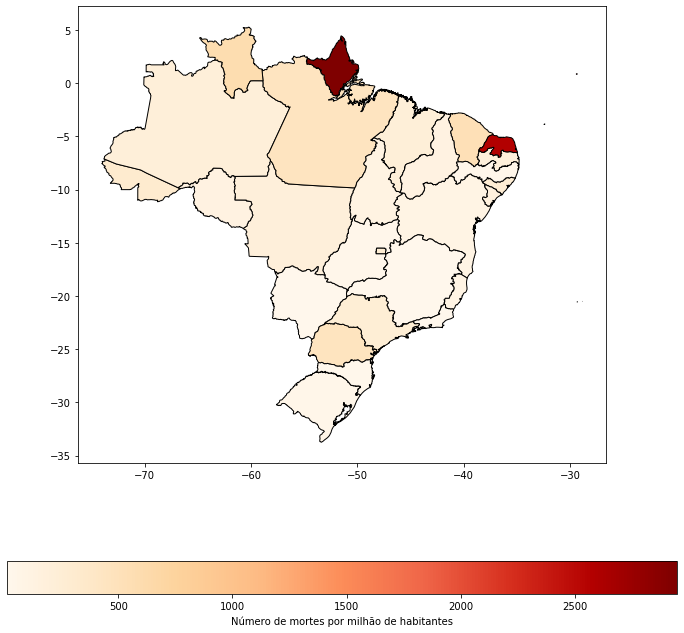

In [13]:
gdf.plot(column='popdeaths',figsize=(12, 12),edgecolor='k',cmap='OrRd',legend=True, legend_kwds={'label': "Número de mortes por milhão de habitantes", 'orientation': "horizontal"})

Como seria de esperar, o estado Amapá também é o estado que contém o maior número de mortes pelo Covid-19 por milhão de habitantes.